In [1]:

from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import enum
# fetch dataset 
multivariate_gait_data = fetch_ucirepo(id=760)

# data (as pandas dataframes) 
X = multivariate_gait_data.data.features 
y = multivariate_gait_data.data.targets 

# metadata 
# print(multivariate_gait_data.metadata) 

# variable information 
# print(multivariate_gait_data.variables) 


In [2]:

def get_data(data, 
             subject=None,
             condition=None,
             replication=None,
             leg=None, 
             joint=None,
             time=None,
             angle=None):
    """ 
    Attribute Information:
        Biomechanical analysis of human locomotion
    Reference:
        Smoothing spline analysis of variance models: 
            A new tool for the analysis of cyclic biomechanical data.
        By Nathaniel E. Helwig, K. A. Shorter, Ping Ma, E. Hsiao-Wecksler. 2016
        Published in Journal of Biomechanics
    Args:
        data (pd.DataFrame): 데이터
        subject (int): 1 = subject 1, …, 10 = subject 10 (integer)
        condition (int): 1 = unbraced, 2 = knee brace, 3 = ankle brace
        replication (int): replication: 1 = replication 1, …, 10 = replication 10 
        leg (int): leg: 1 = left, 2 = right 
        joint (int): 1 = ankle, 2 = knee, 3 = hip
        time (int): 0 = 0% gait cycle, …, 100 = 100% gait cycle
        angle (float): joint angle in degrees
    """

    # Filtering data if None all data
    filters = {
        'subject': subject,
        'condition': condition,
        'replication': replication,
        'leg': leg,
        'joint': joint,
        'time': time,
        'angle': angle
    }
    
    for key, value in filters.items():
        if value is not None:
            data = data[data[key] == value]
    return data


1 1 0
1 2 1
2 1 2
2 2 3
3 1 4
3 2 5
4 1 6
4 2 7
5 1 8
5 2 9


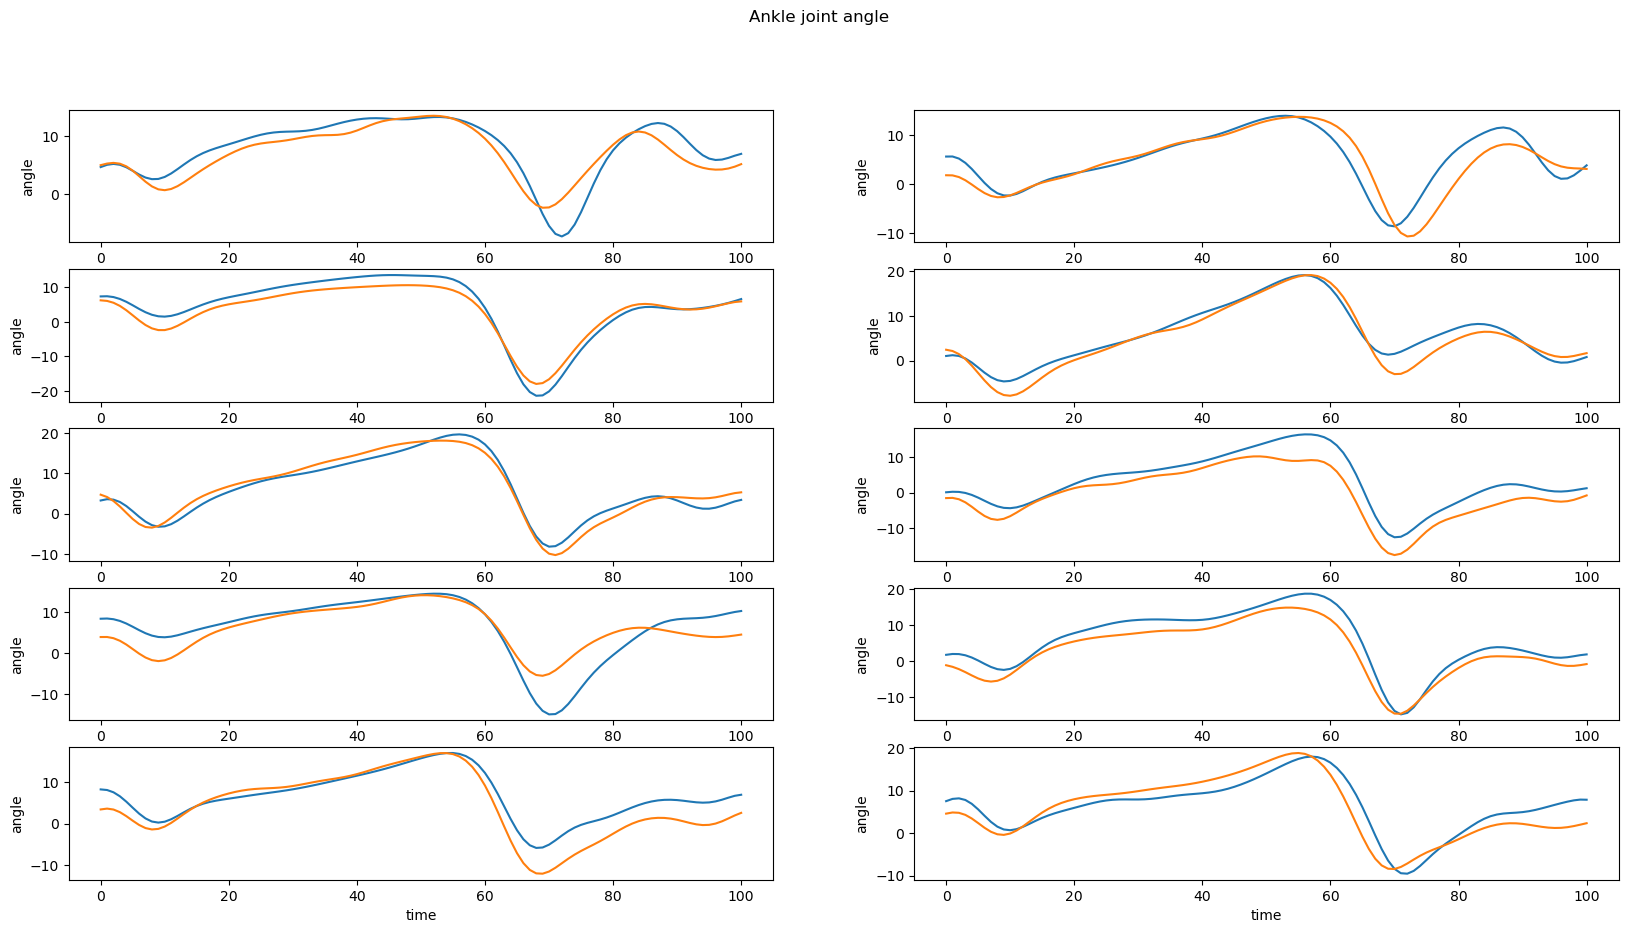

In [ ]:
import seaborn as sns

CONSTANT = {
    'subject': [i for i in range(1, 11)],
    'condition': {
        'unbraced': 1,
        'knee': 2,
        'ankle': 3
        },
    'replication': [i for i in range(1, 11)],
    'leg': {
        'left': 1,
        'right': 2
    },
    'joint': {
        'ankle': 1,
        'knee': 2,
        'hip': 3
        },
    'time': None,
    'angle': None
}

plt.figure(figsize=(20, 10))

for i in range(1, 6):
    for j in range(1, 3):
        plt.subplot(5, 2, 2*(i-1) + j)
        print(i, j, 2*(i-1) + j - 1)
        sbj = CONSTANT['subject'][2*(i-1) + j - 1]
        cond = CONSTANT['condition']['unbraced']
        rep = CONSTANT['replication'][0]
        for leg in ['left', 'right']:
            joint = CONSTANT['joint']['ankle']
            time = CONSTANT['time']
            angle = CONSTANT['angle']
        
            rep1 = get_data(X, subject=sbj, 
                            condition=cond, 
                            replication=rep, 
                            leg=CONSTANT['leg'][leg], 
                            joint=joint, 
                            time=time, 
                            angle=angle)
            plt.xlabel('time')
            plt.ylabel('angle')
            plt.plot(rep1['time'], rep1['angle'])

plt.suptitle('Ankle joint angle')

plt.show()

In [18]:
"""
    data (pd.DataFrame): 데이터
    subject (int): 1 = subject 1, …, 10 = subject 10 (integer)
    condition (int): 1 = unbraced, 2 = knee brace, 3 = ankle brace
    replication (int): replication: 1 = replication 1, …, 10 = replication 10 
    leg (int): leg: 1 = left, 2 = right 
    joint (int): 1 = ankle, 2 = knee, 3 = hip
    time (int): 0 = 0% gait cycle, …, 100 = 100% gait cycle
    angle (float): joint angle in degrees
"""

CONSTANT = {
    'subject': [i for i in range(1, 11)],
    'condition': {
        'unbraced': 1,
        'knee': 2,
        # 'ankle': 3
        },
    'replication': [i for i in range(1, 11)],
    'leg': {
        'left': 1,
        'right': 2
    },
    'joint': {
        'knee': 2,
        'hip': 3
        },
    'time': None,
    'angle': None
}
# Save .csv file 
# The head consist of "condition", "leg", "joint", "time", "angle".
# file_name = 'Case_subCase_condition_leg_joint_condition.csv'
from itertools import product

prods = product(CONSTANT['subject'], 
                CONSTANT['condition'].values(), 
                CONSTANT['replication'], 
                CONSTANT['leg'].values(), 
                CONSTANT['joint'].values(), 
                [None], [None])
from tqdm import tqdm
for prod in prods:
    sbj, cond, rep, leg, joint, time, angle = prod
    rep1 = get_data(X, subject=sbj, 
                    condition=cond, 
                    replication=rep, 
                    leg=leg, 
                    joint=joint, 
                    time=time, 
                    angle=angle)

    # get value to key in dictionary
    leg = list(CONSTANT['leg'].keys())[list(CONSTANT['leg'].values()).index(leg)]
    joint = list(CONSTANT['joint'].keys())[list(CONSTANT['joint'].values()).index(joint)]
    cond = list(CONSTANT['condition'].keys())[list(CONSTANT['condition'].values()).index(cond)]
    rep1[['time', 'angle']].to_csv(f'data/{sbj}_{cond}_{rep}_{leg}_{joint}.csv', index=False)